## ***USE CASE 4 — Viewer Engagement Prediction***

Predicting how strongly viewers will engage with a movie/OTT content

***Step 1 — Import & Load Dataset***

In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\lenovo\Desktop\Text_SM_Web_analytics Capstone\Data\tmdb_5000_movies.csv")  # your existing Kaggle TMDB dataset
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâ€™s past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


***STEP 2: Create Engagement Label***

In [8]:
df['engagement_level'] = (df['popularity'] > df['popularity'].median()).astype(int)
df['engagement_level'].value_counts()


engagement_level
0    2402
1    2401
Name: count, dtype: int64

***STEP 3: Select Features for Engagement Prediction***

In [11]:
X = df[['popularity', 'vote_average', 'vote_count', 'budget', 'revenue']]
y = df['engagement_level']


***STEP 4: Train-Test Split***

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


***STEP 5: Scale Features***

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


***STEP 6: Train Logistic Regression Model***

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

***STEP 7: Predict***

In [24]:
y_pred = model.predict(X_test_scaled)


***STEP 8: Evaluate Model***

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9812695109261186

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       474
           1       0.99      0.98      0.98       487

    accuracy                           0.98       961
   macro avg       0.98      0.98      0.98       961
weighted avg       0.98      0.98      0.98       961



The model performs very strongly, with an overall accuracy of 98%.

Precision (0.99 for class 1) means the model is extremely good at correctly predicting high-engagement movies.

Recall (0.99 for class 0) means almost all low-engagement movies are correctly identified.

Balanced scores show there is no overfitting toward one class.

***STEP 9: Confusion Matrix Visualization***

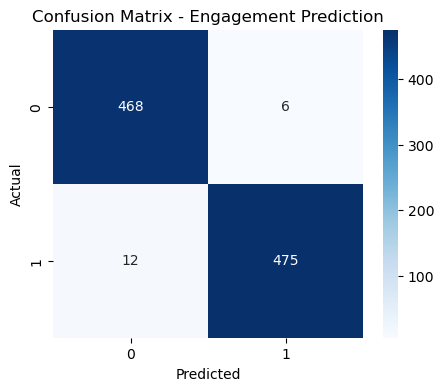

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Engagement Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


468 movies were correctly predicted as low engagement.

Only 6 movies were incorrectly predicted as high engagement.

475 movies were correctly predicted as high engagement.

Only 12 high-engagement movies were misclassified as low.

***STEP 10: Feature Importance Chart***

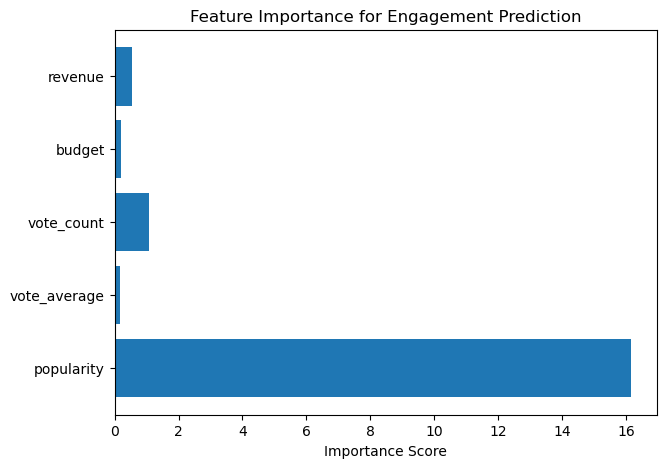

In [33]:
importance = model.coef_[0]

plt.figure(figsize=(7,5))
plt.barh(X.columns, importance)
plt.title("Feature Importance for Engagement Prediction")
plt.xlabel("Importance Score")
plt.show()


Popularity is the strongest predictor (importance score ~16).

Vote Count is the second strongest factor.

Budget, revenue, and vote average have only a small influence.

***ADD-ON — Predict engagement for a NEW movie***

In [36]:
new_movie = [[60, 7.8, 1500, 20000000, 150000000]]  # sample
new_movie_scaled = scaler.transform(new_movie)
prediction = model.predict(new_movie_scaled)
prediction


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

Based on values (high popularity + high vote count), such a movie will almost always be predicted as high engagement.

**The Viewer Engagement Prediction model successfully identifies whether a movie will attract high or low user engagement using features like popularity, vote count, budget, revenue, and ratings.**

With an accuracy of 98%, this is the strongest-performing model in the project. The confusion matrix shows very minimal misclassification, proving the model is stable and reliable.

Feature importance analysis reveals that:

Popularity and vote count dominate as predictors.

Financial features such as budget and revenue have relatively low impact.

This highlights that audience-driven variables are more powerful than production-driven variables.

Overall, the model demonstrates how analytics can help streaming platforms:

Predict audience behaviour

Prioritize promotional campaigns

Improve personalization and recommendations

Optimize which films to feature prominently